In [2]:
import cv2
import glob
import numpy as np

images = np.array([cv2.imread(file) for file in glob.glob("data/textures/*.tif")])

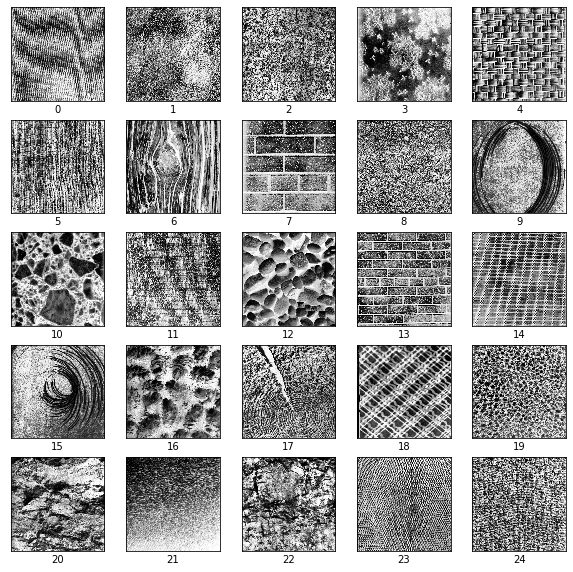

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
    plt.xlabel(i)

In [3]:
import math
import pink

som_dim = 10
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.som(np_som)

trainer = pink.trainer(som)

In [ ]:
np_image = images[0].astype(np.float32)
np_image /= 255

image = pink.data(np_image)
trainer(image)

In [ ]:
from tqdm import tqdm

for i in tqdm(range(len(images))):

    np_image = images[i].astype(np.float32)
    np_image /= 255

    image = pink.data(np_image)
    trainer(image)

np_som = np.array(som, copy=True)

plt.figure()
plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.colorbar()
plt.grid(False)